<h4>Importing required libraries</h4>

In [19]:
%matplotlib inline

import geopandas 
import numpy as np
import pandas as pd

In [2]:
# https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dfixed/year%3D2020/quarter%3D4/2020-10-01_performance_fixed_tiles.zip

<h4>Loading OOKLA shapefile</h4>

In [3]:
ookla = geopandas.read_file("../../Data/ookla_CA.shp")

<h4>Taking a peek at the loaded data from shapefile</h4>

In [4]:
ookla.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,Shape_Leng,Shape_Area,geometry
0,0230102111211101,263676,12636,23,18,7,0.019562,0.000024,"POLYGON ((-121.12976 38.68551, -121.12427 38.6..."
1,0230102300200330,153768,20153,12,35,16,0.019696,0.000024,"POLYGON ((-122.31079 37.55329, -122.30530 37.5..."
2,0230132121003021,205705,18892,19,16,7,0.020129,0.000025,"POLYGON ((-116.31775 33.67864, -116.31226 33.6..."
3,0230102301102031,155128,15177,17,23,11,0.019682,0.000024,"POLYGON ((-121.79993 37.67513, -121.79443 37.6..."
4,0230102300313123,216943,141579,9,131,42,0.019699,0.000024,"POLYGON ((-122.00867 37.53151, -122.00317 37.5..."


<h4>Loading a visualization of the data to make sure the shapefile loaded correctly</h4>

<AxesSubplot:>

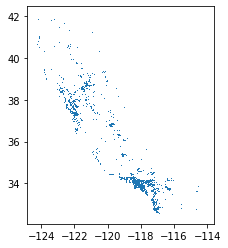

In [5]:
ookla.plot()

<h4>Loading Block Groups shapefile</h4>

In [6]:
bg = geopandas.read_file("../../Data/tl_2020_06_bg.zip")

<h4>Taking a peek at the loaded block groups data</h4>

In [7]:
bg.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,053,001500,1,060530015001,Block Group 1,G5030,S,3348560,0,+36.6564570,-121.6749086,"POLYGON ((-121.69184 36.65885, -121.68510 36.6..."
1,06,073,002712,2,060730027122,Block Group 2,G5030,S,337744,0,+32.7303521,-117.0787620,"POLYGON ((-117.08306 32.72588, -117.08280 32.7..."
2,06,073,018601,2,060730186012,Block Group 2,G5030,S,886725,0,+33.2295683,-117.3482855,"POLYGON ((-117.35296 33.22489, -117.35294 33.2..."
3,06,073,018609,3,060730186093,Block Group 3,G5030,S,379311,0,+33.2495250,-117.3148675,"POLYGON ((-117.31819 33.25084, -117.31819 33.2..."
4,06,073,019406,3,060730194063,Block Group 3,G5030,S,649440,0,+33.2018708,-117.2686502,"POLYGON ((-117.27370 33.19762, -117.27367 33.1..."


<h4>Checking coordinate system of both datasets</h4>

In [8]:
print(bg.crs)
print(ookla.crs)

epsg:4269
epsg:4326


<h4>Checking bounds of both datasets</h4>

In [9]:
print(ookla.total_bounds)
print(bg.total_bounds)

[-124.35424805   32.53292068 -114.12597656   42.00440721]
[-124.482003   32.528832 -114.131211   42.009503]


<h4>Bringing both datasets to same coordinate system</h4>

In [10]:
bg = bg.to_crs(4326)

<h4>Verifying coordinate system change</h4>

In [11]:
print(bg.crs)
print(ookla.crs)

epsg:4326
epsg:4326


<h4>Checking bounds of both datasets after coordinate system change</h4>

In [12]:
print(ookla.total_bounds)
print(bg.total_bounds)

[-124.35424805   32.53292068 -114.12597656   42.00440721]
[-124.482003   32.528832 -114.131211   42.009503]


<h4>Performing spatial join of ookla data with block groups using intersect operation</h4>

In [13]:
joined = geopandas.sjoin(ookla, bg, how="right", op='intersects')

<h4>Peeking at the top rows of the joined data</h4>

In [14]:
joined.head()

,index_left,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,Shape_Leng,Shape_Area,STATEFP,...,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,6781.0,0230102323331001,197881.0,12568.0,17.0,37.0,16.0,0.019799,0.000024,06,...,1,060530015001,Block Group 1,G5030,S,3348560,0,+36.6564570,-121.6749086,"POLYGON ((-121.69184 36.65885, -121.68510 36.6..."
0,16156.0,0230102323331021,61848.0,11742.0,31.0,2.0,1.0,0.019800,0.000024,06,...,1,060530015001,Block Group 1,G5030,S,3348560,0,+36.6564570,-121.6749086,"POLYGON ((-121.69184 36.65885, -121.68510 36.6..."
0,29544.0,0230102323331030,127763.0,10933.0,18.0,210.0,16.0,0.019800,0.000024,06,...,1,060530015001,Block Group 1,G5030,S,3348560,0,+36.6564570,-121.6749086,"POLYGON ((-121.69184 36.65885, -121.68510 36.6..."
0,36083.0,0230102323331012,202328.0,14689.0,20.0,13.0,7.0,0.019799,0.000024,06,...,1,060530015001,Block Group 1,G5030,S,3348560,0,+36.6564570,-121.6749086,"POLYGON ((-121.69184 36.65885, -121.68510 36.6..."
0,39464.0,0230102323331013,230257.0,16783.0,14.0,137.0,21.0,0.019799,0.000024,06,...,1,060530015001,Block Group 1,G5030,S,3348560,0,+36.6564570,-121.6749086,"POLYGON ((-121.69184 36.65885, -121.68510 36.6..."


<h4>Calculating weighted (by devices) means of download speeds, upload speeds, and latency</h4>

In [15]:
bg_stats = (
    joined.groupby(["GEOID"])
    .apply(
        lambda x: pd.Series(
            {"avg_d_kbps_wt": np.average(x["avg_d_kbps"], weights=x["devices"])}
        )
    )
    .reset_index()
    .merge(
        joined.groupby(["GEOID"])
        .apply(
            lambda x: pd.Series(
                {"avg_u_kbps_wt": np.average(x["avg_u_kbps"], weights=x["devices"])}
            )
        ).reset_index(),
        on=["GEOID"],
    )
    .merge(
        joined.groupby(["GEOID"])
        .apply(
            lambda x: pd.Series(
                {"avg_lat_ms_wt": np.average(x["avg_lat_ms"], weights=x["devices"])}
            )
        ).reset_index(),
        on=["GEOID"],
    )
    .merge(
        joined.groupby(["GEOID"])
        .agg(devices=("devices", "sum"))
        .reset_index(),
        on=["GEOID"],
    )
    .reset_index()
    .merge(
        joined.groupby(["GEOID"])
        .agg(tests=("tests", "sum"))
        .reset_index(),
        on=["GEOID"],
    )
)

<h4>Peeking at the top rows of the final calculated statistics</h4>

In [16]:
bg_stats.head()

,index,GEOID,avg_d_kbps_wt,avg_u_kbps_wt,avg_lat_ms_wt,devices,tests
0,0,060014001001,173500.691667,74645.195833,14.562500,240.0,1048.0
1,1,060014001002,184744.985507,70918.586957,20.326087,138.0,754.0
2,2,060014002001,158106.223214,105323.285714,9.517857,112.0,645.0
3,3,060014002002,151896.467005,91971.639594,10.923858,197.0,839.0
4,4,060014003001,168247.950617,94049.549383,12.067901,162.0,641.0


<h4>Checking how many block groups have no ookla data</h4>

In [17]:
bg_stats.isna().sum()

index             0
GEOID             0
avg_d_kbps_wt    23
avg_u_kbps_wt    23
avg_lat_ms_wt    23
devices           0
tests             0
dtype: int64

<h4>Writing output to CSV</h4>

In [18]:
bg_stats.to_csv('ookla_bg.csv', index=False)  